In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv(r"C:\Users\91809\Desktop\Data_Analyst\DataSets\googleplaystore.csv")
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

# Insights and Observation


The DataSet has Missing Values

In [6]:
df['Reviews'].str.isnumeric().sum()

np.int64(10840)

In [7]:
df[~df['Reviews'].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [8]:
df.drop(index=10472, inplace=True)

In [9]:
df['Reviews'].astype(int)

0           159
1           967
2         87510
3        215644
4           967
          ...  
10836        38
10837         4
10838         3
10839       114
10840    398307
Name: Reviews, Length: 10840, dtype: int64

In [10]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [11]:
def convert_size(value):
    if pd.isna(value):
        return None
    
    value = value.strip().upper()
    
    if value.endswith('M'):
        return float(value[:-1]) * 1_000_000
    elif value.endswith('K'):
        return float(value[:-1]) * 1_000
    else:
        return 0 



In [12]:
df['Size_Number'] = df['Size'].apply(convert_size)

In [13]:
df['Size_Number']=df['Size_Number'].astype(int)

In [14]:
df.drop(10839,inplace=True)
df.drop('Size', axis=1, inplace=True)


In [15]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [16]:
df['Price']=df['Price'].str.replace('$','')

In [17]:
df['Price']=df['Price'].astype(float).round(2)

In [18]:
df['Installs']=df['Installs'].str.replace(',','')
df['Installs']=df['Installs'].str.replace('+','')
df['Installs']=df['Installs'].astype(int)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10839 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10839 non-null  object 
 1   Category        10839 non-null  object 
 2   Rating          9365 non-null   float64
 3   Reviews         10839 non-null  object 
 4   Installs        10839 non-null  int64  
 5   Type            10838 non-null  object 
 6   Price           10839 non-null  float64
 7   Content Rating  10839 non-null  object 
 8   Genres          10839 non-null  object 
 9   Last Updated    10839 non-null  object 
 10  Current Ver     10831 non-null  object 
 11  Android Ver     10837 non-null  object 
 12  Size_Number     10839 non-null  int64  
dtypes: float64(2), int64(2), object(9)
memory usage: 1.2+ MB


In [20]:
df['Last Updated']= pd.to_datetime(df['Last Updated'])

In [21]:
df['Day']=df['Last Updated'].dt.day
df['Month']=df['Last Updated'].dt.month
df['Year']=df['Last Updated'].dt.year

In [22]:
df.head()

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_Number,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,19000000,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,14000000,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,8700000,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,25000000,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,2800000,20,6,2018


In [23]:
df.to_csv('Google_Cleaned_DataSet.csv')

## EDA

In [29]:
df[df.duplicated('App')]


,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_Number,Day,Month,Year
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,5000000,Free,0.0,Everyone,Business,2018-02-26,Varies with device,4.0.3 and up,0,26,2,2018
236,Box,BUSINESS,4.2,159872,10000000,Free,0.0,Everyone,Business,2018-07-31,Varies with device,Varies with device,0,31,7,2018
239,Google My Business,BUSINESS,4.4,70991,5000000,Free,0.0,Everyone,Business,2018-07-24,2.19.0.204537701,4.4 and up,0,24,7,2018
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,10000000,Free,0.0,Everyone,Business,2018-07-20,4.1.28165.0716,4.0 and up,37000000,20,7,2018
261,join.me - Simple Meetings,BUSINESS,4.0,6989,1000000,Free,0.0,Everyone,Business,2018-07-16,4.3.0.508,4.4 and up,0,16,7,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10715,FarmersOnly Dating,DATING,3.0,1145,100000,Free,0.0,Mature 17+,Dating,2016-02-25,2.2,4.0 and up,1400000,25,2,2016
10720,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981,1000000,Free,0.0,Everyone,Communication,2018-07-06,5.2,5.0 and up,4000000,6,7,2018
10730,FP Notebook,MEDICAL,4.5,410,50000,Free,0.0,Everyone,Medical,2018-03-24,2.1.0.372,4.4 and up,60000000,24,3,2018
10753,Slickdeals: Coupons & Shopping,SHOPPING,4.5,33599,1000000,Free,0.0,Everyone,Shopping,2018-07-30,3.9,4.4 and up,12000000,30,7,2018


In [32]:
df=df.drop_duplicates(subset=['App'],keep='first')

In [33]:
df[df.duplicated('App')]

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_Number,Day,Month,Year


## Exploring Data

In [35]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 8 numerical features : ['Rating', 'Installs', 'Price', 'Last Updated', 'Size_Number', 'Day', 'Month', 'Year']

We have 8 categorical features : ['App', 'Category', 'Reviews', 'Type', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver']


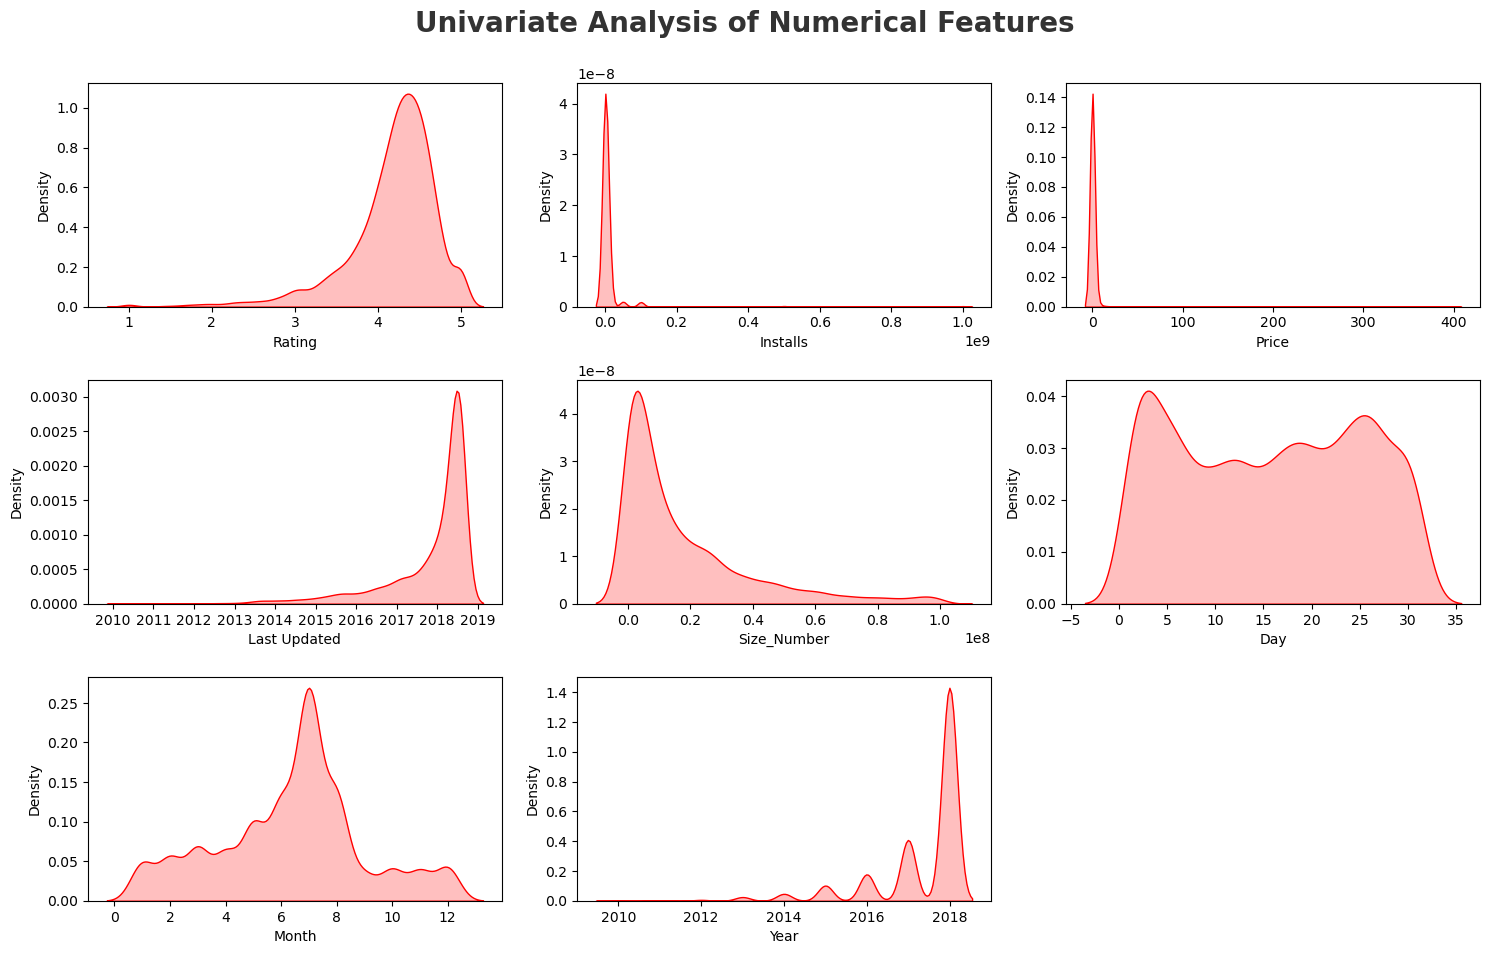

In [39]:
## Proportion of count data on numerical columns
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
   plt.subplot(5, 3, i+1)
   sns.kdeplot(x=df[numeric_features[i]],fill=True, color='r')
   plt.xlabel(numeric_features[i])
   plt.tight_layout()

## Observation

Rating and year are left skewed, whereas Reviews, Size, Installs and Price are right skewed

C:\Users\91809\AppData\Local\Temp\ipykernel_22080\3164046353.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[category[i]],palette="Set2")
C:\Users\91809\AppData\Local\Temp\ipykernel_22080\3164046353.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[category[i]],palette="Set2")


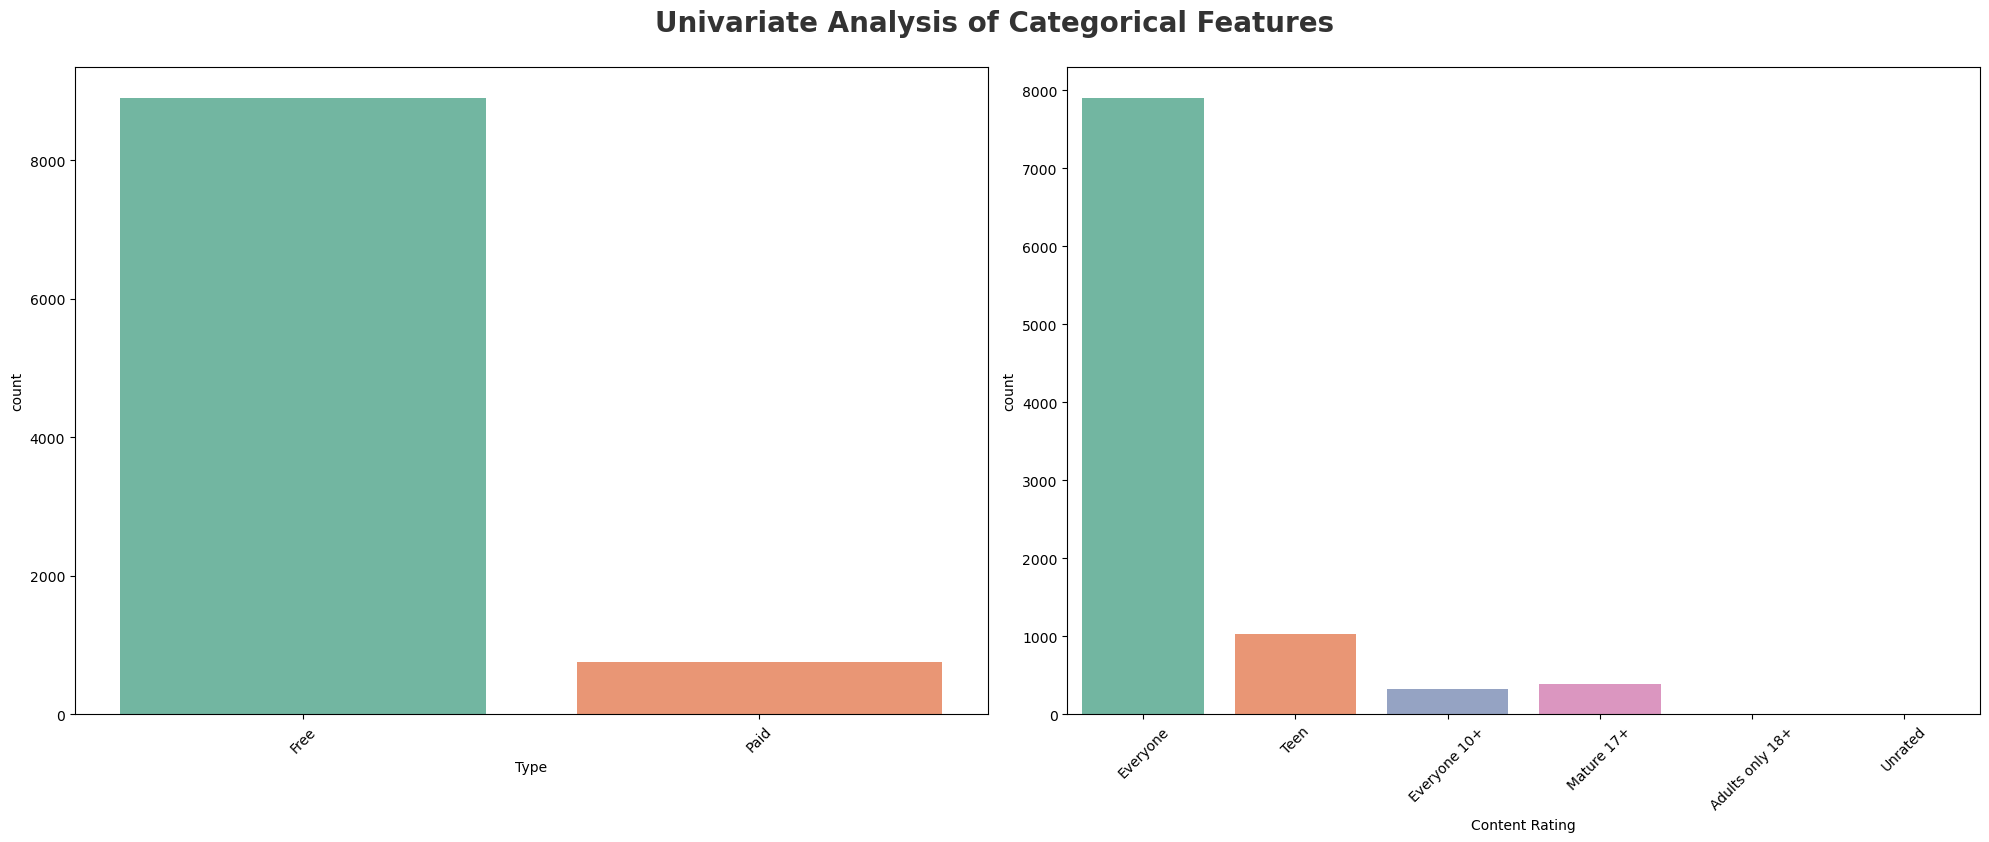

In [43]:
# categorical columns
plt.figure(figsize=(20, 15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
category = [ 'Type', 'Content Rating']
for i in range(0, len(category)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=df[category[i]],palette="Set2")
    plt.xlabel(category[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

## Which is Most popular App Category

<Axes: ylabel='count'>

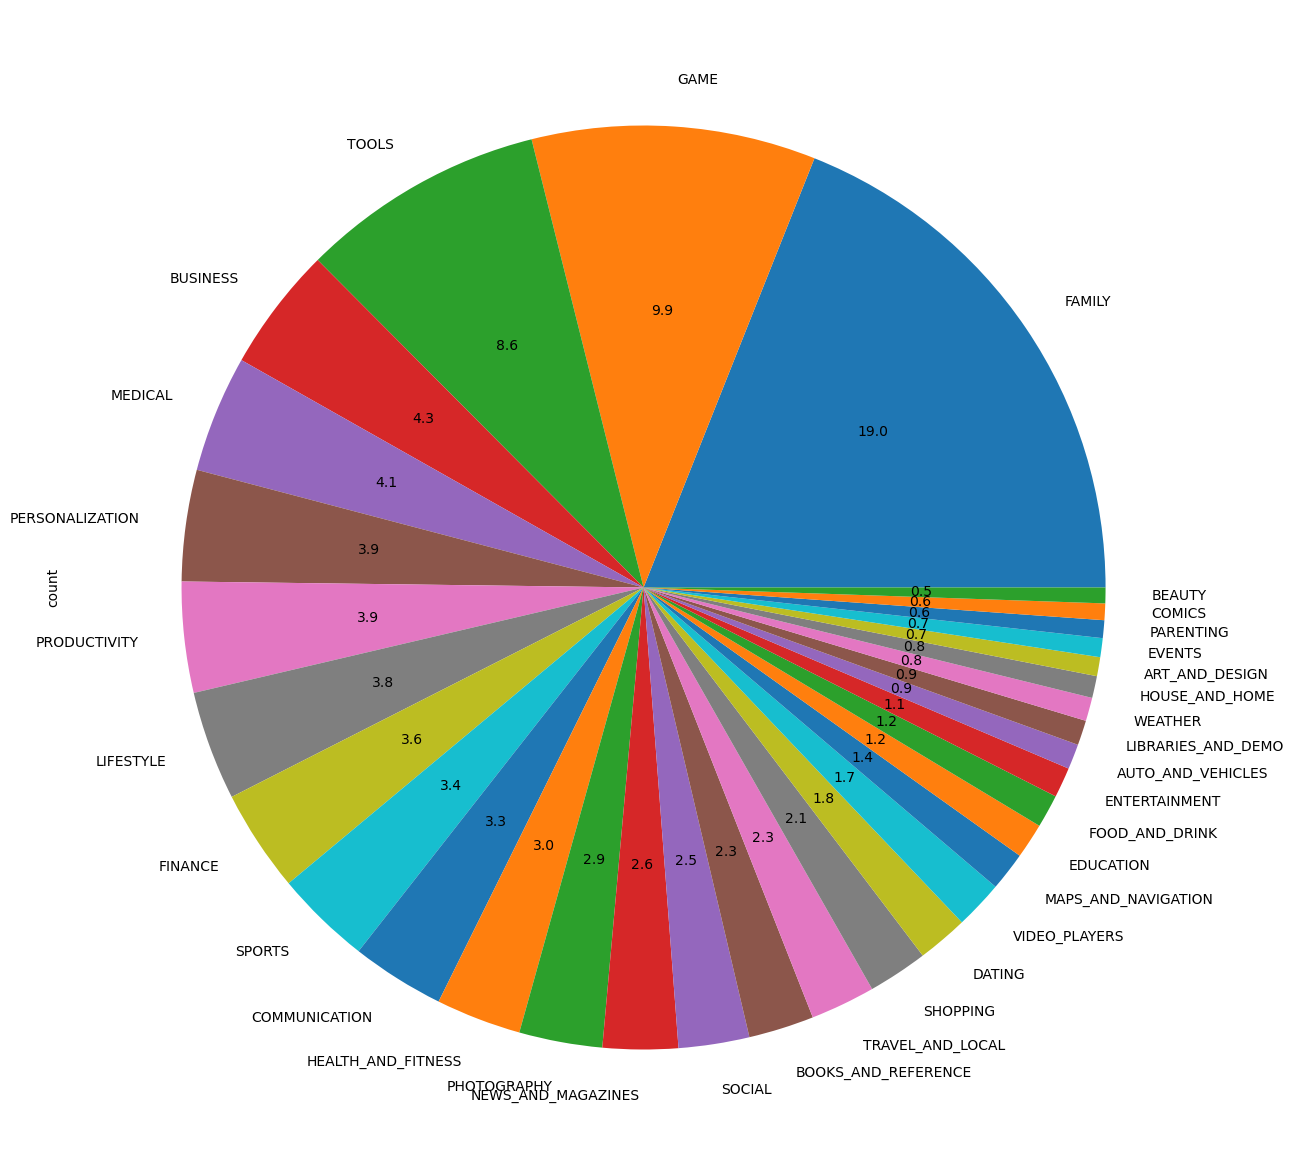

In [46]:
df['Category'].value_counts().plot.pie(y=df['Category'],figsize=(15,15), autopct='%1.1f')

## Observation

1. There are more kinds of apps in playstore which are under category of family, games & tools
2. Beatuty,comics,arts and weather kinds of apps are very less in playstore

C:\Users\91809\AppData\Local\Temp\ipykernel_22080\3509476939.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


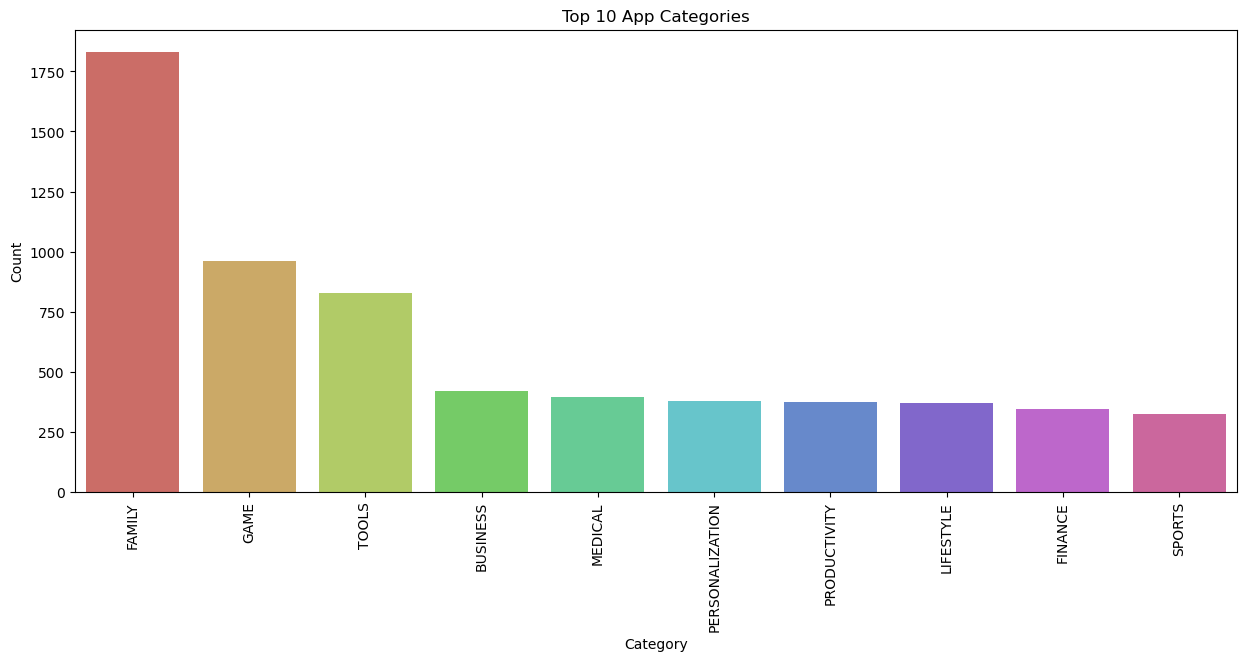

In [50]:
category = df['Category'].value_counts()

category_df = category.reset_index()
category_df.columns = ['Category', 'Count']


## Top 10 App Categories
plt.figure(figsize=(15,6))
sns.barplot(
    x='Category',
    y='Count',
    data=category_df.head(10),
    palette='hls'
)
plt.title('Top 10 App Categories')
plt.xticks(rotation=90)
plt.show()


## Insights


1. Family category has the most number of apps with 18% of apps belonging to it, followed by Games category which has 11% of the apps.
2. Least number of apps belong to the Beauty category with less than 1% of the total apps belonging to it.